In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import joblib

# Hyper param search results

## Gradient Boosting

In [4]:
dd = pd.read_csv("Hyperparam_search/SVM_GS_results.csv")

In [5]:
dd.sort_values(by=["mean_test_F1"], ascending=False).head()

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_accuracy,...,std_test_accuracy,rank_test_accuracy,split0_test_F1,split1_test_F1,split2_test_F1,split3_test_F1,split4_test_F1,mean_test_F1,std_test_F1,rank_test_F1
7,7,126.222607,1.236996,26.665054,0.145072,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.834354,...,0.003933,1,0.786809,0.795040,0.786164,0.797157,0.776030,0.788240,0.007499,1
3,3,91.794349,1.023251,27.488348,0.026995,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.831068,...,0.003721,5,0.785199,0.792571,0.787630,0.795630,0.778996,0.788005,0.005799,2
0,0,100.721196,1.827760,28.011370,0.149500,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.833981,...,0.003891,3,0.786222,0.793233,0.784677,0.790927,0.773849,0.785782,0.006720,3
4,4,146.870323,2.050380,26.789975,0.469019,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.834354,...,0.003303,2,0.784750,0.785752,0.781722,0.789547,0.773095,0.782974,0.005536,4
11,11,178.989075,2.780193,25.920260,0.437622,25,scale,rbf,"{'C': 25, 'gamma': 'scale', 'kernel': 'rbf'}",0.832188,...,0.003310,4,0.781156,0.783828,0.782027,0.788809,0.772894,0.781743,0.005157,5


In [6]:
np.unique(dd["param_C"].values)

array([  1,  10,  25,  50,  75, 100])

In [7]:
np.unique(dd["param_gamma"].values)

array(['0.001', '0.01', '0.1', 'scale'], dtype=object)

In [62]:
pgamma = np.array([0.001, 0.01, 0.07, 0.1])

In [63]:
C, G = np.meshgrid(np.unique(dd["param_C"].values), pgamma)

In [64]:
C

array([[  1,  10,  25,  50,  75, 100],
       [  1,  10,  25,  50,  75, 100],
       [  1,  10,  25,  50,  75, 100],
       [  1,  10,  25,  50,  75, 100]])

In [65]:
G

array([[0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
       [0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 ],
       [0.07 , 0.07 , 0.07 , 0.07 , 0.07 , 0.07 ],
       [0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.1  ]])

In [66]:
grid = lambda df,lr,ne: df[df["param_C"]==lr][df["param_gamma"]==ne]["mean_test_F1"].values[0]

In [68]:
Y_1 = [grid(dd,n,'0.001') for n in np.unique(dd["param_C"].values)]
Y_3 = [grid(dd,n,"scale") for n in np.unique(dd["param_C"].values)]
Y_2 = [grid(dd,n,'0.01') for n in np.unique(dd["param_C"].values)]
Y_4 = [grid(dd,n,'0.1') for n in np.unique(dd["param_C"].values)]

/Users/Ghosty/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [69]:
Z = np.vstack((Y_1, Y_2,Y_3,Y_4))

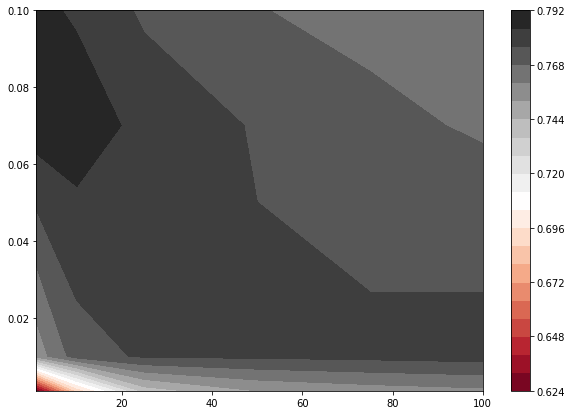

In [70]:
plt.figure(figsize=(10,7))
plt.contourf(C, G, Z, 20, cmap='RdGy')
plt.colorbar()
plt.show()

In [27]:
dc = pd.read_csv("Hyperparam_search/SVM_GS_CVAE_elu_results.csv")

In [28]:
dc.sort_values(by=["mean_test_F1"], ascending=False).head()

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_accuracy,...,std_test_accuracy,rank_test_accuracy,split0_test_F1,split1_test_F1,split2_test_F1,split3_test_F1,split4_test_F1,mean_test_F1,std_test_F1,rank_test_F1
0,0,97.680438,5.791368,28.705295,2.223985,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.838237,...,0.004028,3,0.789364,0.802397,0.791160,0.802246,0.783477,0.793729,0.007462,1
3,3,85.976293,3.115731,26.638293,0.225740,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.835474,...,0.003538,5,0.787857,0.800408,0.794434,0.799481,0.782970,0.793031,0.006723,2
7,7,128.012036,6.040978,26.609327,1.146093,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.840179,...,0.003922,1,0.794062,0.797575,0.794132,0.794100,0.779205,0.791815,0.006447,3
4,4,159.802753,8.510879,26.762137,0.839174,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.838536,...,0.004212,2,0.786326,0.795740,0.789696,0.793142,0.778711,0.788724,0.005928,4
11,11,170.444028,4.143445,25.406041,0.597963,25,scale,rbf,"{'C': 25, 'gamma': 'scale', 'kernel': 'rbf'}",0.836968,...,0.004475,6,0.784907,0.792570,0.785336,0.789972,0.773142,0.785186,0.006672,5


In [71]:
Y_1 = [grid(dc,n,'0.001') for n in np.unique(dd["param_C"].values)]
Y_3 = [grid(dc,n,"scale") for n in np.unique(dd["param_C"].values)]
Y_2 = [grid(dc,n,'0.01') for n in np.unique(dd["param_C"].values)]
Y_4 = [grid(dc,n,'0.1') for n in np.unique(dd["param_C"].values)]
Z1 = np.vstack((Y_1, Y_2, Y_3, Y_4))

/Users/Ghosty/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


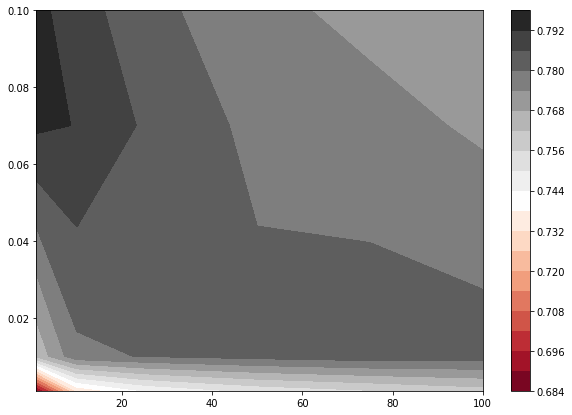

In [72]:
plt.figure(figsize=(10,7))
plt.contourf(C, G, Z1, 20, cmap='RdGy')
plt.colorbar()
plt.show()

In [36]:
dr = pd.read_csv("Hyperparam_search/SVM_GS_LSTM_results.csv")

In [37]:
dr.sort_values(by=["mean_test_F1"], ascending=False).head()

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_accuracy,...,std_test_accuracy,rank_test_accuracy,split0_test_F1,split1_test_F1,split2_test_F1,split3_test_F1,split4_test_F1,mean_test_F1,std_test_F1,rank_test_F1
23,23,136.975841,2.200803,22.996254,0.472610,100,scale,rbf,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}",0.830246,...,0.003774,1,0.788064,0.799798,0.791047,0.793089,0.775469,0.789494,0.008003,1
19,19,120.700509,1.970945,22.701440,0.465616,75,scale,rbf,"{'C': 75, 'gamma': 'scale', 'kernel': 'rbf'}",0.829500,...,0.003748,2,0.786916,0.798719,0.788953,0.792964,0.775946,0.788700,0.007543,2
15,15,104.998210,1.040820,23.312394,0.183782,50,scale,rbf,"{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}",0.828305,...,0.003650,3,0.785875,0.797594,0.788175,0.793475,0.775783,0.788181,0.007425,3
11,11,88.963005,1.429340,23.226407,0.503023,25,scale,rbf,"{'C': 25, 'gamma': 'scale', 'kernel': 'rbf'}",0.827035,...,0.003642,4,0.785165,0.797199,0.786614,0.794482,0.774684,0.787629,0.007915,4
7,7,79.162946,1.840006,23.967950,0.154458,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.825840,...,0.003745,5,0.782990,0.795335,0.785045,0.793050,0.772895,0.785864,0.007980,5


In [74]:
Y_1 = [grid(dr,n,'0.001') for n in np.unique(dd["param_C"].values)]
Y_4 = [grid(dr,n,"scale") for n in np.unique(dd["param_C"].values)]
Y_2 = [grid(dr,n,'0.01') for n in np.unique(dd["param_C"].values)]
Y_3 = [grid(dr,n,'0.1') for n in np.unique(dd["param_C"].values)]
Z2 = np.vstack((Y_1, Y_2, Y_3, Y_4))

/Users/Ghosty/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [75]:
pgamma = np.array([0.001, 0.01, 0.1, 0.27] )

C, G = np.meshgrid(np.unique(dd["param_C"].values), pgamma)

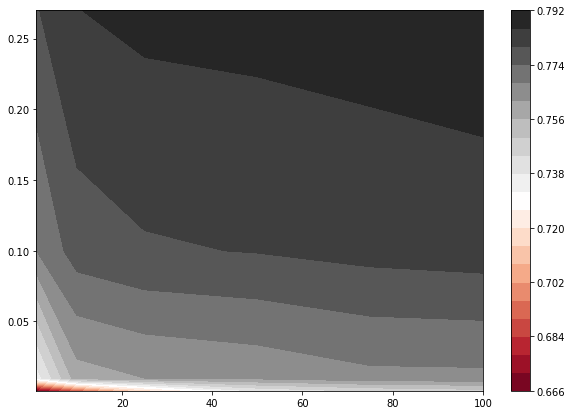

In [76]:
plt.figure(figsize=(10,7))
plt.contourf(C, G, Z2, 20, cmap='RdGy')
plt.colorbar()
plt.show()

In [10]:
1/(np.var(X_train)*X_train.shape[1])

0.07008767133336684

# Best params 
## DeepDense VAE

In [41]:
X_train = np.load("data/encoded_data_train_DeepDenseVAE_mark_V_[160-256-128-15]_VDO_GNLL_400ep_lr-1e-4.npy")
y_train = np.load("data/labels_train.npy")
X_test = np.load("data/encoded_data_test_DeepDenseVAE_mark_V_[160-256-128-15]_VDO_GNLL_400ep_lr-1e-4.npy")
y_test = np.load("data/labels_test.npy")

In [42]:
dd_clf = SVC(kernel="rbf", C=10, gamma="scale")

In [43]:
dd_clf.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
#joblib.dump(dd_clf, "models_and_losses/SVM_DeepDenseVAE{kerner=rbf,C=10,gamma=scale=0.07}.joblib")

['models_and_losses/SVM_DeepDenseVAE{kerner=rbf,C=10,gamma=scale=0.07}.joblib']

In [46]:
y_pred_dd = dd_clf.predict(X_test)

In [47]:
f1_score(y_true=y_test, y_pred = y_pred_dd, average="macro")

0.8029322574632699

In [48]:
accuracy_score(y_true=y_test, y_pred = y_pred_dd)

0.8417184512428298

In [49]:
confusion_matrix(y_true=y_test, y_pred = y_pred_dd)

array([[2567, 1520,   27,  121],
       [ 341, 9948,   33,  123],
       [  27,   35,  397,   20],
       [ 222,  169,   11, 1175]])

## CNN-VAE

In [51]:
X_train = np.load("data/encoded_data_train_DeepConvVAE_ELU_NLL_250ep_lr-{1e-3, 1e-4}_bs-300.npy")
X_test = np.load("data/encoded_data_test_DeepConvVAE_ELU_NLL_250ep_lr-{1e-3, 1e-4}_bs-300.npy")

In [52]:
1/(np.var(X_train)*X_train.shape[1])

0.07350118567710469

In [53]:
dc_clf = SVC(kernel="rbf", C=1, gamma=0.1)

In [54]:
dc_clf.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
#joblib.dump(dc_clf, "models_and_losses/SVM_CNN-VAE{kerner=rbf,C=1,gamma=0.1}.joblib")

['models_and_losses/SVM_CNN-VAE{kerner=rbf,C=1,gamma=0.1}.joblib']

In [55]:
y_pred_dc = dc_clf.predict(X_test)

In [56]:
f1_score(y_true=y_test, y_pred = y_pred_dc, average="macro")

0.8074439550968406

In [57]:
accuracy_score(y_true=y_test, y_pred = y_pred_dc)

0.8454827915869981

In [58]:
confusion_matrix(y_true=y_test, y_pred = y_pred_dc)

array([[ 2542,  1538,    30,   125],
       [  300, 10011,    31,   103],
       [   21,    41,   399,    18],
       [  201,   165,    13,  1198]])

## LSTM-VAE

In [60]:
X_train1 = np.load("data/mu_lstm1.npy")
X_train2 = np.load("data/mu_lstm2.npy")
X_train3 = np.load("data/mu_lstm3.npy")

X_train = np.vstack((X_train1, X_train2, X_train3))

X_test = np.load("data/mu_lstm_test.npy")

In [61]:
1/(np.var(X_train)*X_train.shape[1])

0.2772047392196986

In [77]:
dr_clf = SVC(kernel="rbf", C=100, gamma="scale")

In [78]:
dr_clf.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [83]:
#joblib.dump(dc_clf, "models_and_losses/SVM_LSTM-VAE{kerner=rbf,C=100,gamma=scale=0.27}.joblib")

['models_and_losses/SVM_LSTM-VAE{kerner=rbf,C=100,gamma=scale=0.27}.joblib']

In [79]:
y_pred_dr = dr_clf.predict(X_test)

In [80]:
f1_score(y_true=y_test, y_pred = y_pred_dr, average="macro")

0.803976007985282

In [81]:
accuracy_score(y_true=y_test, y_pred = y_pred_dr)

0.8381931166347992

In [82]:
confusion_matrix(y_true=y_test, y_pred = y_pred_dr)

array([[ 2367,  1722,    26,   120],
       [  296, 10013,    41,    95],
       [   22,    34,   404,    19],
       [  183,   137,    13,  1244]])